# step-1: Load the Dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('news_dataset.csv')

In [3]:
data = df.copy()

In [4]:
data['text'][3]

'A dozen politically active pastors came here for a private dinner Friday night to hear a conversion story unique in the context of presidential politics: how Louisiana Gov. Bobby Jindal traveled from Hinduism to Protestant Christianity and, ultimately, became what he calls an “evangelical Catholic.”\n\nOver two hours, Jindal, 42, recalled talking with a girl in high school who wanted to “save my soul,” reading the Bible in a closet so his parents would not see him and feeling a stir while watching a movie during his senior year that depicted Jesus on the cross.\n\n“I was struck, and struck hard,” Jindal told the pastors. “This was the Son of God, and He had died for our sins.”\n\nJindal’s session with the Christian clergy, who lead congregations in the early presidential battleground states of Iowa and South Carolina, was part of a behind-the-scenes effort by the Louisiana governor to find a political base that could help propel him into the top tier of Republican candidates seeking t

In [5]:
df.head()

Unnamed: 0                                              title   
0           0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...  \
1           1                                                NaN   
2           2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3           3  Bobby Jindal, raised Hindu, uses story of Chri...   
4           4  SATAN 2: Russia unvelis an image of its terrif...   

                                                text  label  
0  No comment is expected from Barack Obama Membe...      1  
1     Did they post their votes for Hillary already?      1  
2   Now, most of the demonstrators gathered last ...      1  
3  A dozen politically active pastors came here f...      0  
4  The RS-28 Sarmat missile, dubbed Satan 2, will...      1

# Step-2: Import necessary library

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [7]:
#!pip install -U scikit-learn

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, RocCurveDisplay, classification_report

In [12]:
#!pip install wordcloud

In [13]:
from wordcloud import WordCloud

In [14]:
from nltk.tokenize import word_tokenize

In [15]:
from nltk.corpus import stopwords

In [16]:
from nltk.stem import WordNetLemmatizer
import plotly.express as px
import string
import warnings
warnings.filterwarnings('ignore')

In [17]:
df.tail()

Unnamed: 0                                              title   
72129       72129  Russians steal research on Trump in hack of U....  \
72130       72130   WATCH: Giuliani Demands That Democrats Apolog...   
72131       72131  Migrants Refuse To Leave Train At Refugee Camp...   
72132       72132  Trump tussle gives unpopular Mexican leader mu...   
72133       72133  Goldman Sachs Endorses Hillary Clinton For Pre...   

                                                    text  label  
72129  WASHINGTON (Reuters) - Hackers believed to be ...      0  
72130  You know, because in fantasyland Republicans n...      1  
72131  Migrants Refuse To Leave Train At Refugee Camp...      0  
72132  MEXICO CITY (Reuters) - Donald Trump’s combati...      0  
72133  Goldman Sachs Endorses Hillary Clinton For Pre...      1

In [18]:
df.shape

(72134, 4)

In [19]:
df['text'][72130]

'You know, because in fantasyland Republicans never questioned the citizenship of America s first black president.But that s exactly what they did for years and Donald Trump led the charge by going on or calling into Fox News every chance he could in order to demand President Obama s birth certificate.It was Trump who constantly claimed President Obama was born in Kenya even though Hawaii newspapers from the time announce Obama s birth.Trump and his birther fans were finally utterly humiliated when President Obama released his birth certificate to the public.And now that birtherism is coming back to bite Trump on the ass as he tries to convince black voters that he isn t a racist.Part of the reason why black voters reject Trump is because he questioned the citizenship of President Obama simply because he is black. But Trump wants everyone to pretend he didn t say any nasty things about President Obama and Trump pawn Rudy Giuliani is demanding that Democrats apologize for Trump s birthe

In [20]:
df.drop('Unnamed: 0', axis=1, inplace = True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   71576 non-null  object
 1   text    72095 non-null  object
 2   label   72134 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [22]:
df.isnull().sum()

title    558
text      39
label      0
dtype: int64

# Step-3: Hnadle Null value and separate features from labels

In [23]:
df.fillna(' ', inplace=True)

In [24]:
df.isnull().sum()

title    0
text     0
label    0
dtype: int64

In [25]:
x = df[['title', 'text']]
labels = df['label']

In [26]:
label_status = df['label'].value_counts()

In [27]:
label_status

label
1    37106
0    35028
Name: count, dtype: int64

In [28]:
trans = label_status.index

In [29]:
trans

Index([1, 0], dtype='int64', name='label')

In [30]:
quantity = label_status.values # converting to array

In [31]:
quantity

array([37106, 35028], dtype=int64)

In [32]:
figure = px.pie(df, values=quantity, names=trans, hole=0.60, title="Span & Ham Status")
figure.show()

# Step-4: Create word clouds

In [33]:
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=600, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    
fake_text = ' '.join(df[df['label'] == 0]['text'])
real_text = ' '.join(df[df['label'] == 1]['text'])

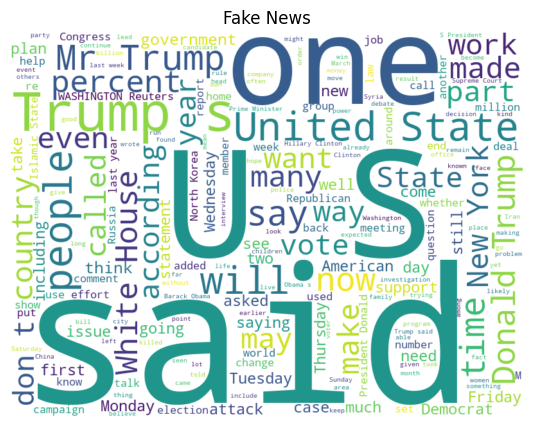

In [34]:
plot_wordcloud(fake_text, 'Fake News')
#plt.figure(figsize=(10, 10))
plt.show()

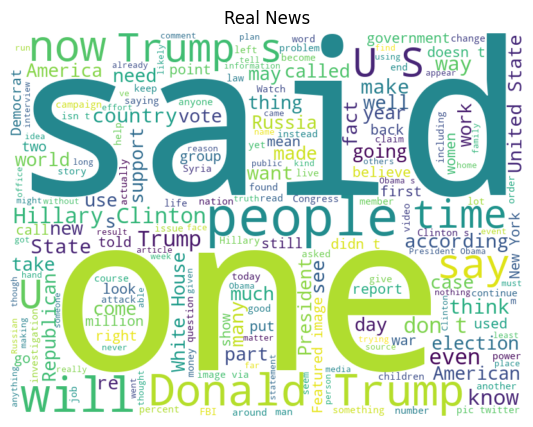

In [35]:
plot_wordcloud(real_text, 'Real News')
plt.show()

# Step-5: Text Preprocessing

In [36]:
text_column = 'text'
text_column

'text'

In [37]:
label_column = 'label'

Stop words are a set of commonly used words in a language. Examples of stop words in English are “a,” “the,” “is,” “are,” etc. Stop words are commonly used in Text Mining and Natural Language Processing (NLP) to eliminate words that are so widely used that they carry very little useful information.

In [38]:
stopword = set(stopwords.words('english'))
stopword

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [39]:
stopwords.fileids()

['arabic',
 'azerbaijani',
 'basque',
 'bengali',
 'catalan',
 'chinese',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'greek',
 'hebrew',
 'hinglish',
 'hungarian',
 'indonesian',
 'italian',
 'kazakh',
 'nepali',
 'norwegian',
 'portuguese',
 'romanian',
 'russian',
 'slovene',
 'spanish',
 'swedish',
 'tajik',
 'turkish']

In [40]:
#stopword = set(stopwords.words('bengali'))
#stopword

In [41]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [42]:
len(string.punctuation)

32

In [43]:
def preprocess_text(text):
    # remove punction
    remove_punc = [char for char in text if char not in string.punctuation]
    clean_words = ''.join(remove_punc) # char joinoing
    
    
    # remove stopwords
    text = ([word for word in clean_words.split() if word.lower() not in stopword])
    return text

In [44]:
df[text_column] = df[text_column].apply(preprocess_text)

In [45]:
df[text_column]

0        [comment, expected, Barack, Obama, Members, FY...
1                          [post, votes, Hillary, already]
2        [demonstrators, gathered, last, night, exercis...
3        [dozen, politically, active, pastors, came, pr...
4        [RS28, Sarmat, missile, dubbed, Satan, 2, repl...
                               ...                        
72129    [WASHINGTON, Reuters, Hackers, believed, worki...
72130    [know, fantasyland, Republicans, never, questi...
72131    [Migrants, Refuse, Leave, Train, Refugee, Camp...
72132    [MEXICO, CITY, Reuters, Donald, Trump’s, comba...
72133    [Goldman, Sachs, Endorses, Hillary, Clinton, P...
Name: text, Length: 72134, dtype: object

# Step-6: Lemmatization

In [46]:
lemmatizer = WordNetLemmatizer()

In [47]:
def lematize_text(text):
    lematized_text = ' '.join([lemmatizer.lemmatize(word) for word in text])
    return lematized_text
df[text_column] = df[text_column].apply(lematize_text)

In [48]:
df[text_column]

0        comment expected Barack Obama Members FYF911 F...
1                                post vote Hillary already
2        demonstrator gathered last night exercising co...
3        dozen politically active pastor came private d...
4        RS28 Sarmat missile dubbed Satan 2 replace SS1...
                               ...                        
72129    WASHINGTON Reuters Hackers believed working Ru...
72130    know fantasyland Republicans never questioned ...
72131    Migrants Refuse Leave Train Refugee Camp Hunga...
72132    MEXICO CITY Reuters Donald Trump’s combative s...
72133    Goldman Sachs Endorses Hillary Clinton Preside...
Name: text, Length: 72134, dtype: object

In [49]:
df[text_column][0] # after lematization

'comment expected Barack Obama Members FYF911 FukYoFlag BlackLivesMatter movement called lynching hanging white people cop encouraged others radio show Tuesday night turn tide kill white people cop send message killing black people AmericaOne FYoFlag organizer called Sunshine radio blog show hosted Texas called Sunshine Fing Opinion Radio Show snapshot FYF911 LOLatWhiteFear Twitter page 953 pm show urging supporter Call fyf911 tonight continue dismantle illusion white SNAPSHOT Twitter Radio Call Invite FYF911The radio show aired 1000 pm eastern standard timeDuring show caller clearly call lynching killing white peopleA 239 minute clip radio show heard provided Breitbart Texas someone would like referred Hannibal already received death threat result interrupting FYF911 conference callsAn unidentified black man said mother fkers start fing Like u bunch niers takin one u roll said Cause already roll gang anyway six seven black mother fckers see white person lynch as Let turn table conspir

# Step-7: TF-IDF Vectorization 

In [50]:
vct = TfidfVectorizer()

x = vct.fit_transform(df[text_column])
y = df[label_column]

In [51]:
x

<72134x363106 sparse matrix of type '<class 'numpy.float64'>'
	with 14808111 stored elements in Compressed Sparse Row format>

# Step-8: Split the dataset

In [52]:
xtrain, xtest, ytrain, ytest = train_test_split(x, labels, test_size=0.30, random_state=42) 

In [53]:
xtrain.shape

(50493, 363106)

In [54]:
xtest.shape

(21641, 363106)

# Step-9: Evaluate Naive Bayes Model

In [55]:
from sklearn.metrics import precision_recall_curve, auc,roc_auc_score

In [56]:
def evaluate_model(model, xtest, ytest):
    y_pred = model.predict(xtest)
    accuracy = accuracy_score(ytest, y_pred)
    cm = confusion_matrix(ytest, y_pred)
    prob = model.predict_proba(xtest)[:, 1]
    roc_auc = roc_auc_score(ytest, prob)
    fpr, tpr, thresholds = roc_curve(ytest, prob)
    precision, recall, _ = precision_recall_curve(ytest, prob)
    pr_auc = auc(recall, precision)
    
    return {
        'Accuracy': accuracy,
        'Confusion Matrix': cm,
    }

# Step-10: Build Naive bayes Model

# Multinomial Naive Bayes

In [57]:
mnb_model = MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
mnb_model.fit(xtrain, ytrain)

MultinomialNB()

In [58]:
nb_result = evaluate_model(mnb_model, xtest, ytest)

In [59]:
nb_result

{'Accuracy': 0.8765306593965159,
 'Confusion Matrix': array([[9711,  902],
        [1770, 9258]], dtype=int64)}

# Evaluate Manually

In [60]:
cm = confusion_matrix(ytest, mnb_model.predict(xtest))

In [61]:
cm

array([[9711,  902],
       [1770, 9258]], dtype=int64)

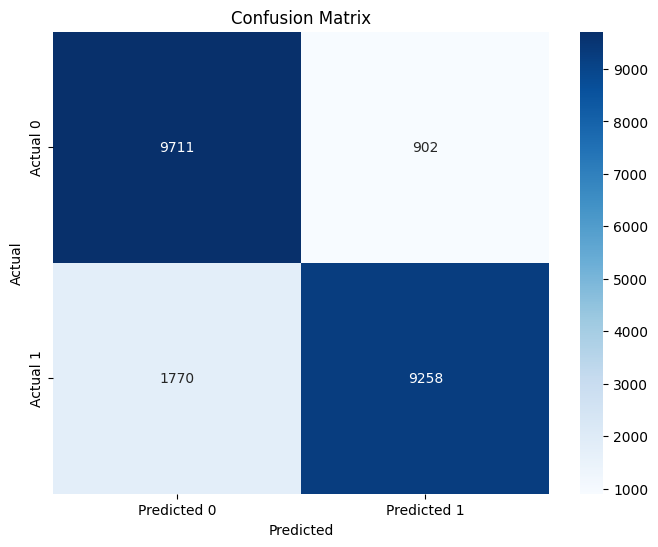

In [62]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
           xticklabels=['Predicted 0', 'Predicted 1'],
           yticklabels=['Actual 0', 'Actual 1'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [63]:
print(classification_report(ytest, mnb_model.predict(xtest)))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88     10613
           1       0.91      0.84      0.87     11028

    accuracy                           0.88     21641
   macro avg       0.88      0.88      0.88     21641
weighted avg       0.88      0.88      0.88     21641



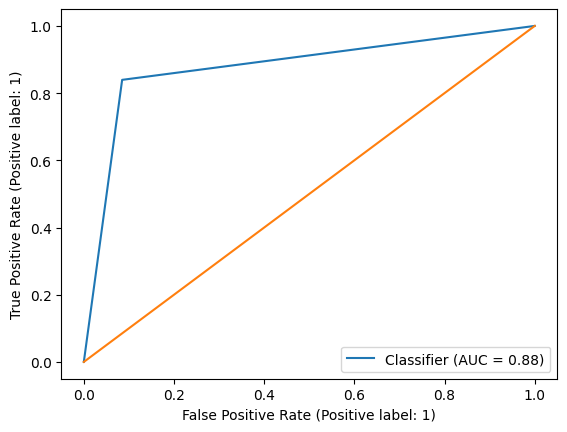

In [64]:
RocCurveDisplay.from_predictions(ytest, mnb_model.predict(xtest))
plt.plot([0, 1],[0,1])
plt.show()

# Bernouli Naive bayes

In [65]:
bnb_model = BernoulliNB(alpha=1.0, binarize=0.0, fit_prior=True, class_prior=None)

In [66]:
bnb_model.fit(xtrain, ytrain)

BernoulliNB()

In [67]:
bnb_result = evaluate_model(bnb_model, xtest, ytest)

In [68]:
bnb_result

{'Accuracy': 0.8547202070144633,
 'Confusion Matrix': array([[8573, 2040],
        [1104, 9924]], dtype=int64)}

In [69]:
cm_bnb = confusion_matrix(ytest, bnb_model.predict(xtest))

In [70]:
cm_bnb

array([[8573, 2040],
       [1104, 9924]], dtype=int64)

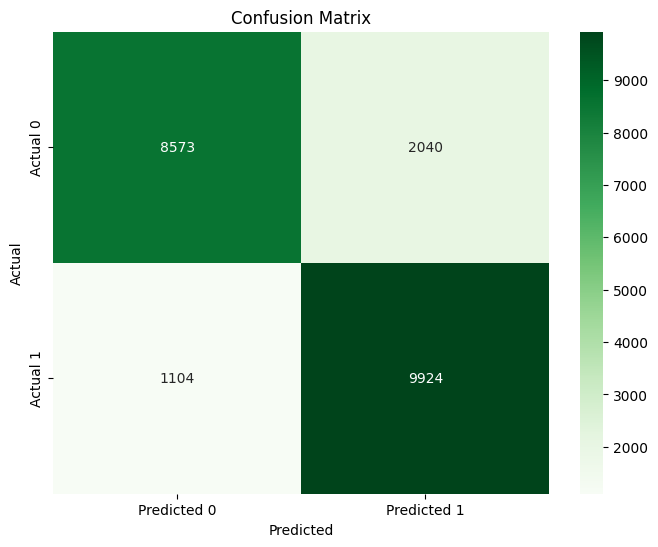

In [71]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_bnb, annot=True, fmt='d', cmap='Greens',
           xticklabels=['Predicted 0', 'Predicted 1'],
           yticklabels=['Actual 0', 'Actual 1'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

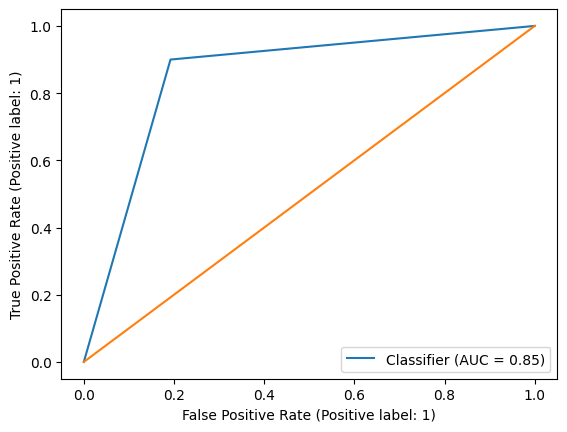

In [72]:
RocCurveDisplay.from_predictions(ytest, bnb_model.predict(xtest))
plt.plot([0,1],[0,1])
plt.show()

In [73]:
print(classification_report(ytest, bnb_model.predict(xtest)))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85     10613
           1       0.83      0.90      0.86     11028

    accuracy                           0.85     21641
   macro avg       0.86      0.85      0.85     21641
weighted avg       0.86      0.85      0.85     21641



# Step-10: Logistic Regression

In [74]:
lr_model = LogisticRegression(max_iter=1000)

In [75]:
lr_model.fit(xtrain, ytrain)

LogisticRegression(max_iter=1000)

In [76]:
lr_result = evaluate_model(lr_model, xtest, ytest)

In [77]:
lr_result

{'Accuracy': 0.9512499422392681,
 'Confusion Matrix': array([[ 9975,   638],
        [  417, 10611]], dtype=int64)}

In [78]:
cm_lr = confusion_matrix(ytest, lr_model.predict(xtest))

In [79]:
cm_lr

array([[ 9975,   638],
       [  417, 10611]], dtype=int64)

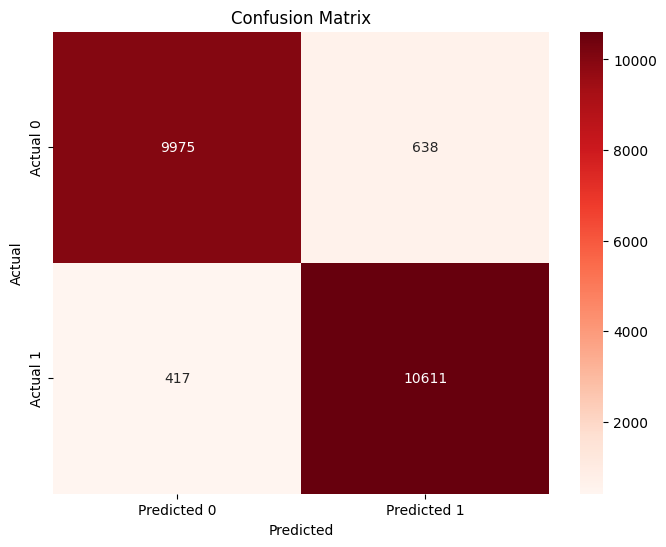

In [80]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Reds',
           xticklabels=['Predicted 0', 'Predicted 1'],
           yticklabels=['Actual 0', 'Actual 1'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

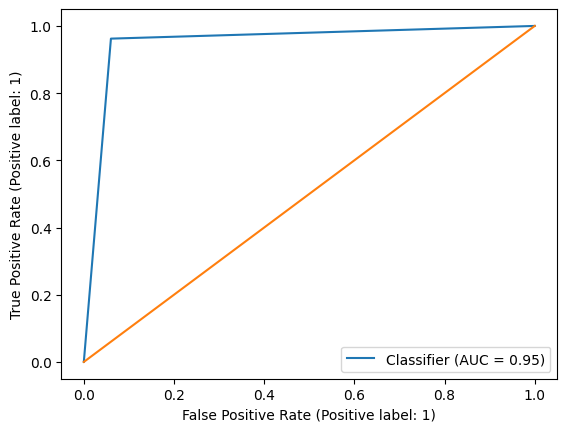

In [81]:
RocCurveDisplay.from_predictions(ytest, lr_model.predict(xtest))
plt.plot([0, 1],[0, 1])
plt.show()

In [82]:
print(classification_report(ytest, lr_model.predict(xtest)))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95     10613
           1       0.94      0.96      0.95     11028

    accuracy                           0.95     21641
   macro avg       0.95      0.95      0.95     21641
weighted avg       0.95      0.95      0.95     21641



# Step-11: Visualize performance with Histogram

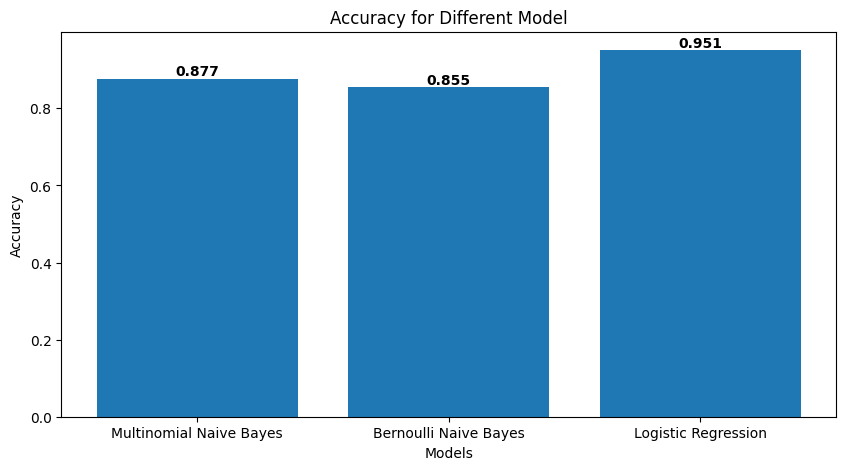

In [83]:
def plot_histogram(metric_values, model_names, metric_names):
    fig, ax = plt.subplots(figsize = (10, 5))
    bars = plt.bar(model_names, metric_values)
    plt.xlabel('Models')
    plt.ylabel(metric_names)
    plt.title(f'{metric_names} for Different Model')
    
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom', color='black', fontweight='bold')
    plt.show()
    
accuracy_values = [nb_result['Accuracy'], bnb_result['Accuracy'], lr_result['Accuracy']]
model_names = ['Multinomial Naive Bayes', 'Bernoulli Naive Bayes', 'Logistic Regression']
plot_histogram(accuracy_values, model_names, 'Accuracy')

# Step-12: Input Random text ans make a prediction

In [84]:
models = [mnb_model, bnb_model, lr_model]

In [85]:
random_text = input()


prp_text = preprocess_text(random_text) # remove punction and stopwords
lmt_text = lematize_text(prp_text) # text scaling
text_vector = vct.transform([lmt_text])

A dozen politically active pastors came here for a private dinner Friday night to hear a conversion story unique in the context of presidential politics: how Louisiana Gov. Bobby Jindal traveled from Hinduism to Protestant Christianity and, ultimately, became what he calls an “evangelical Catholic.”\n\nOver two hours, Jindal, 42, recalled talking with a girl in high school who wanted to “save my soul,” reading the Bible in a closet so his parents would not see him and feeling a stir while watching a movie during his senior year that depicted Jesus on the cross.\n\n“I was struck, and struck hard,” Jindal told the pastors. “This was the Son of God, and He had died for our sins.”\n\nJindal’s session with the Christian clergy, who lead congregations in the early presidential battleground states of Iowa and South Carolina, was part of a behind-the-scenes effort by the Louisiana governor to find a political base that could help propel him into the top tier of Republican candidates seeking to

In [86]:
prp_text

['dozen',
 'politically',
 'active',
 'pastors',
 'came',
 'private',
 'dinner',
 'Friday',
 'night',
 'hear',
 'conversion',
 'story',
 'unique',
 'context',
 'presidential',
 'politics',
 'Louisiana',
 'Gov',
 'Bobby',
 'Jindal',
 'traveled',
 'Hinduism',
 'Protestant',
 'Christianity',
 'ultimately',
 'became',
 'calls',
 '“evangelical',
 'Catholic”nnOver',
 'two',
 'hours',
 'Jindal',
 '42',
 'recalled',
 'talking',
 'girl',
 'high',
 'school',
 'wanted',
 '“save',
 'soul”',
 'reading',
 'Bible',
 'closet',
 'parents',
 'would',
 'see',
 'feeling',
 'stir',
 'watching',
 'movie',
 'senior',
 'year',
 'depicted',
 'Jesus',
 'crossnn“I',
 'struck',
 'struck',
 'hard”',
 'Jindal',
 'told',
 'pastors',
 '“This',
 'Son',
 'God',
 'died',
 'sins”nnJindal’s',
 'session',
 'Christian',
 'clergy',
 'lead',
 'congregations',
 'early',
 'presidential',
 'battleground',
 'states',
 'Iowa',
 'South',
 'Carolina',
 'part',
 'behindthescenes',
 'effort',
 'Louisiana',
 'governor',
 'find',
 'poli

In [87]:
lmt_text

'dozen politically active pastor came private dinner Friday night hear conversion story unique context presidential politics Louisiana Gov Bobby Jindal traveled Hinduism Protestant Christianity ultimately became call “evangelical Catholic”nnOver two hour Jindal 42 recalled talking girl high school wanted “save soul” reading Bible closet parent would see feeling stir watching movie senior year depicted Jesus crossnn“I struck struck hard” Jindal told pastor “This Son God died sins”nnJindal’s session Christian clergy lead congregation early presidential battleground state Iowa South Carolina part behindthescenes effort Louisiana governor find political base could help propel top tier Republican candidate seeking run White House 2016nnKnown GOP circle mostly mastery policy issue health care Jindal Rhodes Scholar graduate Ivy League’s Brown University obvious pool activist supporter help drive excitement outside home state harnessing religious experience way begun appeal part GOP’s influent

In [88]:
text_vector

<1x363106 sparse matrix of type '<class 'numpy.float64'>'
	with 510 stored elements in Compressed Sparse Row format>

In [89]:
text_vector.toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [90]:
for model in models:
    prediction = model.predict(text_vector)
    print(f'Model: {type(model).__name__}')
    print("Prediction: ", prediction)
    print('\n')

Model: MultinomialNB
Prediction:  [0]


Model: BernoulliNB
Prediction:  [0]


Model: LogisticRegression
Prediction:  [0]




# Step-13: Save good model for Deployment

In [91]:
import pickle

In [92]:
model_file_path = 'logistic-regression_model.pkl'

with open (model_file_path, 'wb') as model_file:
    pickle.dump(lr_model, model_file)

# Step-14: Load Model

In [93]:
with open(model_file_path, 'rb') as model_file:
    load_lr = pickle.load(model_file)

In [94]:
load_lr.predict(xtest)

array([1, 1, 0, ..., 1, 1, 0], dtype=int64)

In [95]:
load_lr.score(xtest, ytest)

0.9512499422392681

In [96]:
text_vector

<1x363106 sparse matrix of type '<class 'numpy.float64'>'
	with 510 stored elements in Compressed Sparse Row format>

In [97]:
load_lr.predict(text_vector)

array([0], dtype=int64)